In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Iris dataset  https://archive.ics.uci.edu/ml/datasets/iris4
def import_iris():

    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    irisdata = pd.read_csv("iris.csv", names=colnames)
    irisdata.shape

    # process
    X = irisdata.drop('Class', axis=1)  
    y = irisdata['Class']
    return X,y

# Training the model
X, y = import_iris()
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

def linear_kernel():
    # Linear - TODO
    # NOTE: use 8-degree in the degree hyperparameter. 
    # Trains, predicts and evaluates the model
    svclassifier_linear = SVC(kernel='linear', degree=8, coef0=1, C=5)  
    svclassifier_linear.fit(X_train, y_train)  

    # Predictions
    y_pred = svclassifier_linear.predict(X_test)  

    # Evaluate the model  
    print("Confusion_matrix_linear: \n", confusion_matrix(y_test,y_pred))  
    print("Classification_report_linear: \n", classification_report(y_test,y_pred))

def polynomial_kernel():
    # Poly - TODO
    # NOTE: use 8-degree in the degree hyperparameter. 
    # Trains, predicts and evaluates the model
    svclassifier_poly = SVC(kernel='poly', degree=8, coef0=1, C=5)  
    svclassifier_poly.fit(X_train, y_train)  

    # Predictions
    y_pred = svclassifier_poly.predict(X_test)  

    # Evaluate the model  
    print("\nConfusion_matrix_polynomial: \n", confusion_matrix(y_test,y_pred))  
    print("Classification_report_polynomial: \n", classification_report(y_test,y_pred))
    
def gaussian_kernel():
    # Gaussian - TODO
    # Trains, predicts and evaluates the model
    svclassifier_gaussian = SVC(kernel='rbf', gamma = 'auto', degree=8, coef0=1, C=5)  
    svclassifier_gaussian.fit(X_train, y_train)
    
    # Predictions
    y_pred = svclassifier_gaussian.predict(X_test)  

    # Evaluate the model  
    print("\nConfusion_matrix_gaussian: \n", confusion_matrix(y_test,y_pred))  
    print("Classification_report_gaussian: \n", classification_report(y_test,y_pred))

def sigmoid_kernel():
    # Sigmoid - TODO
    # Trains, predicts and evaluates the model
    svclassifier_sigmoid = SVC(kernel='sigmoid', gamma = 'auto', degree=8, coef0=1, C=5)  
    svclassifier_sigmoid.fit(X_train, y_train)
    
    # Predictions
    y_pred = svclassifier_sigmoid.predict(X_test)  

    # Evaluate the model  
    print("\nConfusion_matrix_sigmoid: \n", confusion_matrix(y_test,y_pred))  
    print("Classification_report_sigmoid: \n", classification_report(y_test,y_pred))
    
def test():
    import_iris()
    linear_kernel()
    polynomial_kernel()
    gaussian_kernel()
    sigmoid_kernel()

test()

Confusion_matrix_linear: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Classification_report_linear: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


Confusion_matrix_polynomial: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  3  7]]
Classification_report_polynomial: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.75      0.90      0.82        10
 Iris-virginica       0.88      0.70      0.78        10

      micro avg       0.87      0.87      0.87        30
      macro avg       0.88      0.87      0.87        30
   weighted avg       0.88      0.87      0.87       

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [5]:
# Encoding classes as numbers
X_org, y_org = import_iris()
X = X_org.drop('petal-length', axis=1)
X = X.drop('petal-width', axis=1)

le= preprocessing.LabelEncoder()
le.fit(y_org)
labels = le.transform(y_org)
class_names = le.classes_

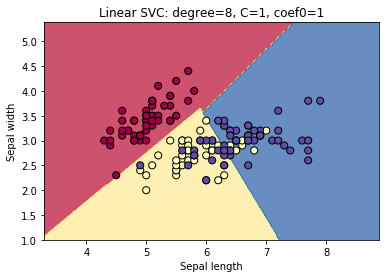

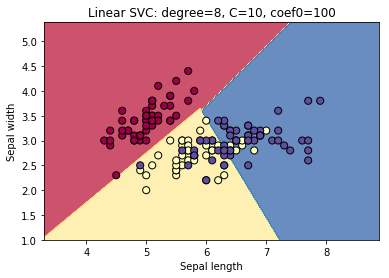

In [14]:
#Plotting Linear SVC

X0, X1 = X.values[:, 0], X.values[:, 1]
x0_min, x0_max = X0.min() - 1, X0.max() + 1
x1_min, x1_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),
                         np.arange(x1_min, x1_max,0.02))

clf_linear = SVC(kernel='linear', degree=8, C=1, coef0=1)
clf_linear.fit(X,labels)

y_pred = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Linear SVC: degree=8, C=1, coef0=1')
plt.show()

clf_linear = SVC(kernel='linear', degree=8, C=10, coef0=100)
clf_linear.fit(X,labels)

y_pred = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Linear SVC: degree=8, C=10, coef0=100')
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


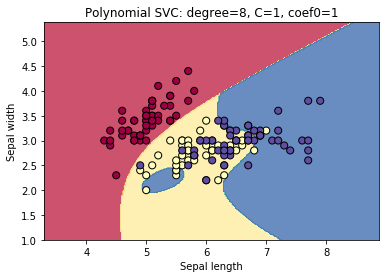

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


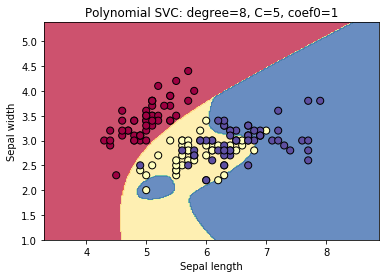

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


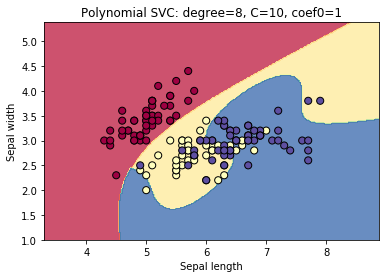

In [19]:
#Plotting Polynomial SVC
X0, X1 = X.values[:, 0], X.values[:, 1]
x0_min, x0_max = X0.min() - 1, X0.max() + 1
x1_min, x1_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),
                         np.arange(x1_min, x1_max,0.02))

clf_polynomial = SVC(kernel='poly', degree=8, C=1, coef0=1)
clf_polynomial.fit(X,labels)

y_pred = clf_polynomial.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Polynomial SVC: degree=8, C=1, coef0=1')
plt.show()

clf_polynomial = SVC(kernel='poly', degree=8, C=5, coef0=1)
clf_polynomial.fit(X,labels)

y_pred = clf_polynomial.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Polynomial SVC: degree=8, C=5, coef0=1')
plt.show()

clf_polynomial = SVC(kernel='poly', degree=8, C=10, coef0=1)
clf_polynomial.fit(X,labels)

y_pred = clf_polynomial.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Polynomial SVC: degree=8, C=10, coef0=1')
plt.show()

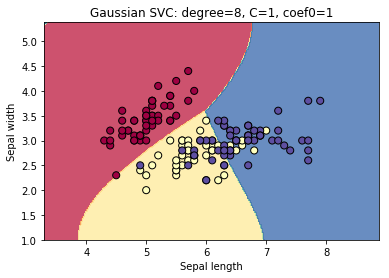

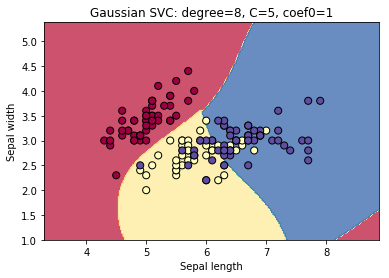

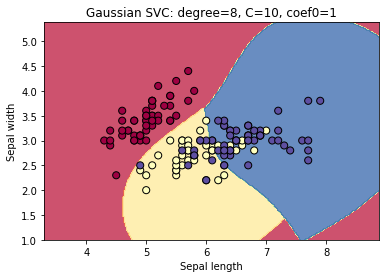

In [18]:
#Plotting Gaussian SVC
X0, X1 = X.values[:, 0], X.values[:, 1]
x0_min, x0_max = X0.min() - 1, X0.max() + 1
x1_min, x1_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),
                         np.arange(x1_min, x1_max,0.02))

clf_gaussian = SVC(kernel='rbf', gamma = 'auto', degree=8, C=1, coef0=1)
clf_gaussian.fit(X,labels)

y_pred = clf_gaussian.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian SVC: degree=8, C=1, coef0=1')
plt.show()

clf_gaussian = SVC(kernel='rbf', gamma = 'auto', degree=8, C=5, coef0=1)
clf_gaussian.fit(X,labels)

y_pred = clf_gaussian.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian SVC: degree=8, C=5, coef0=1')
plt.show()

clf_gaussian = SVC(kernel='rbf', gamma = 'auto', degree=8, C=10, coef0=1)
clf_gaussian.fit(X,labels)

y_pred = clf_gaussian.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gaussian SVC: degree=8, C=10, coef0=1')
plt.show()

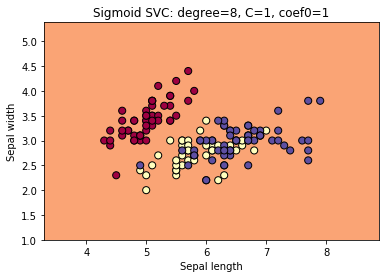

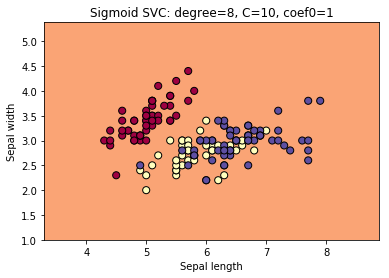

In [17]:
#Plotting Sigmoid SVC
X0, X1 = X.values[:, 0], X.values[:, 1]
x0_min, x0_max = X0.min() - 1, X0.max() + 1
x1_min, x1_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),
                         np.arange(x1_min, x1_max,0.02))

clf_sigmoid = SVC(kernel='sigmoid', gamma=10, degree=8, C=1, coef0=1)
clf_sigmoid.fit(X,labels)

y_pred = clf_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sigmoid SVC: degree=8, C=1, coef0=1')
plt.show()

clf_sigmoid = SVC(kernel='sigmoid', gamma=10, degree=8, C=10, coef0=1)
clf_sigmoid.fit(X,labels)

y_pred = clf_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sigmoid SVC: degree=8, C=10, coef0=1')
plt.show()

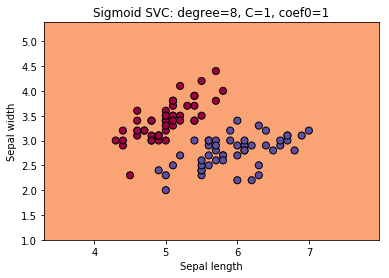

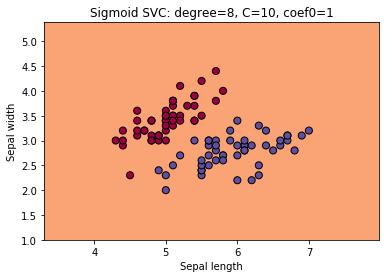

In [13]:
#Plotting Sigmoid SVC for two classes
X_new = X[0:99]
labels_new = labels[0:99]
X0, X1 = X_new.values[:, 0], X_new.values[:, 1]
x0_min, x0_max = X0.min() - 1, X0.max() + 1
x1_min, x1_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),
                         np.arange(x1_min, x1_max,0.02))

clf_sigmoid = SVC(kernel='sigmoid', gamma=10, degree=8, C=1, coef0=1)
clf_sigmoid.fit(X_new,labels_new)

y_pred = clf_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels_new, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sigmoid SVC: degree=8, C=1, coef0=1')
plt.show()

clf_sigmoid = SVC(kernel='sigmoid', gamma=10, degree=8, C=10, coef0=1)
clf_sigmoid.fit(X_new,labels_new)

y_pred = clf_sigmoid.predict(np.c_[xx.ravel(), yy.ravel()])
y_pred = y_pred.reshape(xx.shape)
plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X0, X1, c=labels_new, cmap=plt.cm.Spectral, s=50, edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sigmoid SVC: degree=8, C=10, coef0=1')
plt.show()